In [12]:
# using Gemini Pro with LangChain on Google AI Studio


# I will first install python libs
!pip -q install langchain_experimental langchain_core
!pip -q install google-generativeai==0.3.1
!pip -q install google-ai-generativelanguage==0.4.0
!pip -q install langchain-google-genai
!pip -q install "langchain[docarray]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 8.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [13]:
#Check The model specification
!pip show langchain langchain-core

Name: langchain
Version: 0.0.351
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, async-timeout, dataclasses-json, jsonpatch, langchain-community, langchain-core, langsmith, numpy, pydantic, PyYAML, requests, SQLAlchemy, tenacity
Required-by: langchain-experimental
---
Name: langchain-core
Version: 0.1.1
Summary: Building applications with LLMs through composability
Home-page: https://github.com/langchain-ai/langchain
Author: 
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, jsonpatch, langsmith, packaging, pydantic, PyYAML, requests, tenacity
Required-by: langchain, langchain-community, langchain-experimental, langchain-google-genai


In [24]:
#@title Setting up the Auth
import os
import google.generativeai as genai
from google.colab import userdata
from google.colab import userdata

API_KEY=userdata.get('API_key')

from IPython.display import display
from IPython.display import Markdown

os.environ["GOOGLE_API_KEY"] = userdata.get('API_key')

genai.configure(api_key=os.environ["GOOGLE_API_KEY"])

In [25]:
models = [m for m in genai.list_models()]
models

[Model(name='models/chat-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 Chat (Legacy)',
       description='A legacy text-only model optimized for chat conversations',
       input_token_limit=4096,
       output_token_limit=1024,
       supported_generation_methods=['generateMessage', 'countMessageTokens'],
       temperature=0.25,
       top_p=0.95,
       top_k=40),
 Model(name='models/text-bison-001',
       base_model_id='',
       version='001',
       display_name='PaLM 2 (Legacy)',
       description='A legacy model that understands text and generates text as an output',
       input_token_limit=8196,
       output_token_limit=1024,
       supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
       temperature=0.7,
       top_p=0.95,
       top_k=40),
 Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtai

In [30]:
# generate text
prompt = 'Who is the current president of kenya use 10 words'

model = genai.GenerativeModel('gemini-pro')

response = model.generate_content(prompt)

Markdown(response.text)

William Samoei Ruto, since 13 September 2022

In [36]:
import ipywidgets as widgets
from IPython.display import display
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from IPython.display import Markdown
llm = ChatGoogleGenerativeAI(model="gemini-pro", temperature=0.7)
# Create a text input field
input_text = widgets.Textarea(
    value='',
    placeholder='Type your question here...',
    description='Question:',
    disable=False
)
# Create a button to submit the question
submit_button = widgets.Button(description="Submit")
# Display the input field and the button
display(input_text, submit_button)
def on_button_clicked(b):
    # When the button is clicked, get the question from the input field and invoke the model
    question = input_text.value
    result = llm.invoke(question)
    display(Markdown(result.content))
# Set the function to be called when the button is clicked
submit_button.on_click(on_button_clicked)

Textarea(value='', description='Question:', placeholder='Type your question here...')

Button(description='Submit', style=ButtonStyle())

Harry Maguire

William Ruto

1. The current president of Kenya is William Ruto. He was elected on 9th August 2022 and sworn into office on 13th September 2022, succeeding Uhuru Kenyatta.


2. The current Vice-Chancellor of Karatina University is Prof. Mucai Muchiri. He was appointed to the position on 23rd February 2023, succeeding Prof. Jane Nyutu.

In [38]:
# Create a text input field
input_text = widgets.Textarea(
    value='',
    placeholder='Type your text here...',
    description='Text:',
    disable=False
)

# Create a button to submit the text
submit_button = widgets.Button(description="Submit")

# Display the input field and the button
display(input_text, submit_button)
def on_button_clicked(b):
    # When the button is clicked, get the text from the input field and stream the model
    text = input_text.value
    for chunk in llm.stream(text):
        print(chunk.content)
        print("---")
# Set the function to be called when the button is clicked
submit_button.on_click(on_button_clicked)

Textarea(value='', description='Text:', placeholder='Type your text here...')

Button(description='Submit', style=ButtonStyle())

LLM stands for Large Language Model. It is a type of artificial intelligence (
---
AI) that can understand and generate human language. LLMs are trained on massive datasets of text and code, which allows them to learn the patterns and structures of
---
 language. This enables them to perform a wide range of language-related tasks, such as:

* **Text generation:** LLMs can generate text that is both coherent and grammatically correct. This can be used for a variety of applications, such as creative writing, news article generation, and chatbot development.
*
---
 **Language translation:** LLMs can translate text from one language to another. They are able to learn the different grammar rules and vocabulary of different languages, which allows them to produce accurate and fluent translations.
* **Question answering:** LLMs can answer questions based on the information they have been trained on. This can be used for a variety of applications, such as customer service chatbots, search engi

In [39]:
## Basic Multi Chain
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser

model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [52]:
prompt = ChatPromptTemplate.from_template(
    "tell me a short joke about {topic}"
)

output_parser = StrOutputParser()

In [53]:
chain = prompt | model | output_parser

In [54]:
chain.invoke({"topic": "machine learning"})

'Why did the machine learning model get kicked out of the restaurant?\n\nBecause it was overfitting.'

## More Complicated Chain - Mini RAG

In [55]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain.vectorstores import DocArrayInMemorySearch

In [56]:
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.7)

In [65]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

vectorstore = DocArrayInMemorySearch.from_texts(
    # mini docs for embedding
    ["Samuel Kiando is A student in karatina and he is an aspiring student to be from Data",
     "Samuel Leaves around kirima",
     "His Nickname is KIASH",
     "He loves coding LLMS , Data Science  , Machine Learning , Deep Learing As well"],

    embedding=embeddings # passing in the embedder model
)

retriever = vectorstore.as_retriever()

In [66]:
retriever.get_relevant_documents("whos is Samuel Describe using 10 words ?")

[Document(page_content='Samuel Leaves around kirima'),
 Document(page_content='His Nickname is KIASH'),
 Document(page_content='Samuel Kiando is A student in karatina and he is an aspiring student to be from Data'),
 Document(page_content='He loves coding LLMS , Data Science  , Machine Learning , Deep Learing As well')]

In [67]:
template = """Answer the question a a full sentence, based only on the following context:
{context}

Return you answer in three back ticks

Question: {question}
"""
prompt = ChatPromptTemplate.from_template(template)

In [68]:
from langchain.schema.runnable import RunnableMap
chain = RunnableMap({
    "context": lambda x: retriever.get_relevant_documents(x["question"]),
    "question": lambda x: x["question"]
}) | prompt | model | output_parser

In [69]:
chain.invoke({"question": "Who is Sauel kiando?"})

'Samuel Kiando is an aspiring student from Karatina who loves coding LLMS, Data Science, Machine Learning, and Deep Learning.'

In [71]:
#PAL Chain'
from langchain_experimental.pal_chain import PALChain
from langchain.chains.llm import LLMChain
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0)
pal_chain = PALChain.from_math_prompt(model, verbose=True)

In [76]:
question = "The cafeteria had 23 apples. \
If they used 20 for lunch and bought 6 more,\
how many apples do they have?"

In [77]:
pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?"""
    apples_initial = 23
    apples_used = 20
    apples_bought = 6
    apples_left = apples_initial - apples_used + apples_bought
    result = apples_left
    return result

> Finished chain.


{'question': 'The cafeteria had 23 apples. If they used 20 for lunch and bought 6 more,how many apples do they have?',
 'result': '9'}

In [78]:
question = "If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready \
 and walk to school, at what time will you get to school?"

pal_chain.invoke(question)



> Entering new PALChain chain...
def solution():
    """If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?"""
    wake_up_time = "7:00 a.m."
    get_ready_time = "1 hour and 30 minutes"
    school_arrival_time = "8:30 a.m."
    result = school_arrival_time
    return result

> Finished chain.


{'question': 'If you wake up at 7:00 a.m. and it takes you 1 hour and 30 minutes to get ready  and walk to school, at what time will you get to school?',
 'result': '8:30 a.m.'}

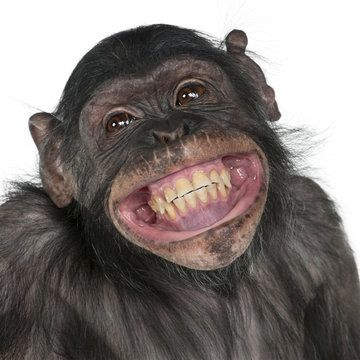

In [87]:
import requests
from IPython.display import Image

image_url = "https://imgs.search.brave.com/fFhEWCb3STMwapInaR-SkThIfVNaL4-ZRgzxY7_4ivI/rs:fit:500:0:0/g:ce/aHR0cHM6Ly90My5m/dGNkbi5uZXQvanBn/LzAwLzI4LzA4LzQw/LzM2MF9GXzI4MDg0/MDEwX2JHUkpldFBm/QndOY08zWXVSQzJD/M1B6N3FBU29jV1E0/LmpwZw"
content = requests.get(image_url).content
Image(content,width=300)

In [88]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What is the image showing ??",
        },
        {
            "type": "image_url",
            "image_url": image_url
         },
    ]
)

llm.invoke([message])

AIMessage(content=' A smiling chimpanzee')